In [2]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

In [120]:
landmarks_values = {
                    0: "nose",
                    1: "left eye (inner)",
                    2: "left eye",
                    3: "left eye (outer)",
                    4: "right eye (inner)",
                    5: "right eye",
                    6: "right eye (outer)",
                    7: "left ear",
                    8:  "right ear",
                    9: "mouth (left)",
                    10: "mouth (right)",
                    11: "left shoulder",
                    12: "right shoulder",
                    13:  "left elbow",
                    14: "right elbow",
                    15:  "left wrist",
                    16: "right wrist",
                    17: "left pinky",
                    18: "right pinky",
                    19: "left index",
                    20: "right index",
                    21: "left thumb",
                    22: "right thumb",
                    23: "left hip",
                    24: "right hip",
                    25: "left knee",
                    26: "right knee",
                    27: "left ankle",
                    28: "right ankle",
                    29: "left heel",
                    30: "right heel",
                    31: "left foot index",
                    32: "right foot index"
                }

In [121]:
def view_img(img):
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [122]:
def img_to_rgb(image):
    """
    Convert an image to RGB format using OpenCV.

    Parameters:
        image (numpy.ndarray): Input image in BGR or grayscale format.

    Returns:
        numpy.ndarray: Image in RGB format.
    """
    # Convert the image from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return rgb_image

In [123]:
import mediapipe as mp
model_path = r"C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\pose-estimation-analysis\pose_landmarker_full.task"

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

detector = PoseLandmarker.create_from_options(options)

In [124]:
# Load the input image from an image file.
img_path = r"C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\pose-estimation-analysis\Capture.PNG"
mp_image = mp.Image.create_from_file(img_path)

# # Load the input image from a numpy array.
# mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_image)

In [125]:
pose_landmarker_result = detector.detect(mp_image)


In [126]:
pose_landmarker_result.pose_landmarks[0]

[NormalizedLandmark(x=0.8003451824188232, y=0.254043847322464, z=-0.14827483892440796, visibility=0.9989902377128601, presence=0.9971081614494324),
 NormalizedLandmark(x=0.8085962533950806, y=0.22799280285835266, z=-0.10452231764793396, visibility=0.9995208978652954, presence=0.9970368146896362),
 NormalizedLandmark(x=0.8071837425231934, y=0.22633293271064758, z=-0.10493683069944382, visibility=0.9993591904640198, presence=0.99741530418396),
 NormalizedLandmark(x=0.8056677579879761, y=0.22446921467781067, z=-0.10537845641374588, visibility=0.9996217489242554, presence=0.9974538683891296),
 NormalizedLandmark(x=0.8040823936462402, y=0.2266215980052948, z=-0.19871081411838531, visibility=0.9994333386421204, presence=0.9964901804924011),
 NormalizedLandmark(x=0.7996532917022705, y=0.22423702478408813, z=-0.19871842861175537, visibility=0.9990554451942444, presence=0.9961169958114624),
 NormalizedLandmark(x=0.794452428817749, y=0.2213069498538971, z=-0.19882835447788239, visibility=0.99938

In [127]:
point_of_interest = {"points": [12, 24, 26, 28, 11, 23, 25, 27],
                     "coordenates": ["x","y","z"]}

In [128]:
import numpy as np
from mediapipe.framework.formats import landmark_pb2
from mediapipe import solutions


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]
    
    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image, pose_landmarks

In [129]:
img = cv2.imread(img_path)
rgb_image = img_to_rgb(img)

annotated_img, pose_landmarks = draw_landmarks_on_image(rgb_image, pose_landmarker_result)
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

view_img(annotated_img)

In [13]:
data = [pose_landmarks[i] for i in point_of_interest["points"]]
import pandas as pd
pd.DataFrame(data)

x         y         z  visibility  presence
0  0.577996  0.267328 -0.569795    0.999125  0.998164
1  0.241270  0.432394 -0.266248    0.998566  0.998395
2  0.547959  0.525241 -0.285269    0.524261  0.978523
3  0.325259  0.619344  0.235275    0.125878  0.767453
4  0.591753  0.276466  0.323341    0.999236  0.999491
5  0.287954  0.437991  0.266027    0.999173  0.999592
6  0.522249  0.542433  0.408163    0.227813  0.979639
7  0.378722  0.617575  0.623539    0.107236  0.741593

In [143]:
video_path = 'files\MOVIE.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)

frame_count = 0

landmark_dict = {}

while True:
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        print("End of video.")
        break
    
    #convert frame to rgb
    frame_rgb = img_to_rgb(frame)

    mp_image= mp.Image(image_format=mp.ImageFormat.SRGB, 
                         data=frame_rgb)

    result = detector.detect(mp_image)
    
    #calculating realtime duration of the current frame
    frame_time_seconds = frame_count/fps

    if result.pose_landmarks:
        annotated_img, pose_landmarks = draw_landmarks_on_image(frame_rgb, result)


    else:
        annotated_img = frame

    frame = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)


        # Write frame time on the top-left corner
    frame_time_seconds = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

    # cv2.putText(frame, f"Time: {frame_time_seconds:.2f} seconds", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    landmark_dict[frame_time_seconds] = pose_landmarks

    # Display the frame
    # cv2.imshow('Frame', frame)

    frame_count+=1
    # print(frame_time_seconds)
    # Wait for a key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the OpenCV windows
cap.release()
cv2.destroyAllWindows()

End of video.


In [15]:
# video_path = 'files\MOVIE.mp4'
# cap = cv2.VideoCapture(video_path)

# # Check if the video opened successfully
# if not cap.isOpened():
#     print("Error: Could not open video.")
#     exit()

# fps = cap.get(cv2.CAP_PROP_FPS)

# frame_count = 0

# landmark_dict = {}

# while True:
#     ret, frame = cap.read()

#     # Check if the frame was read successfully
#     if not ret:
#         print("End of video.")
#         break
    
#     #convert frame to rgb
#     frame_rgb = img_to_rgb(frame)

#     mp_image= mp.Image(image_format=mp.ImageFormat.SRGB, 
#                          data=frame_rgb)

#     result = detector.detect(mp_image)
    
#     #calculating realtime duration of the current frame
#     frame_time_seconds = frame_count/fps

#     if result.pose_landmarks:
#         annotated_img, pose_landmarks = draw_landmarks_on_image(frame_rgb, result)


#     else:
#         annotated_img = frame

#     frame = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

#     frame_time_seconds = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

#     landmark_dict[frame_time_seconds] = pose_landmarks


#     frame_count+=1
#     # print(frame_time_seconds)
#     # Wait for a key press
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture object and close the OpenCV windows
# cap.release()
# cv2.destroyAllWindows()

In [136]:
landmarks_len = len(landmark_dict[0.0])-1

In [137]:
landmark_dict

{0.0: [NormalizedLandmark(x=0.7293537855148315, y=0.40444085001945496, z=-0.0737341046333313, visibility=0.9992390871047974, presence=0.9998123049736023),
  NormalizedLandmark(x=0.7442129254341125, y=0.3960135877132416, z=-0.04377026855945587, visibility=0.9995898604393005, presence=0.9997778534889221),
  NormalizedLandmark(x=0.7441259622573853, y=0.3949865698814392, z=-0.04393521696329117, visibility=0.9993846416473389, presence=0.9997901320457458),
  NormalizedLandmark(x=0.7439264059066772, y=0.3936137855052948, z=-0.04403569921851158, visibility=0.9996554851531982, presence=0.9997828602790833),
  NormalizedLandmark(x=0.7422549724578857, y=0.39471277594566345, z=-0.10533449053764343, visibility=0.9994961023330688, presence=0.9997454285621643),
  NormalizedLandmark(x=0.740620493888855, y=0.3927612900733948, z=-0.1053856611251831, visibility=0.9991897940635681, presence=0.9997068047523499),
  NormalizedLandmark(x=0.7393816709518433, y=0.3905012607574463, z=-0.10549487918615341, visibil

In [ ]:
new_data = {}

In [151]:
landmark_dict[0.0][0]

NormalizedLandmark(x=0.7293537855148315, y=0.40444085001945496, z=-0.0737341046333313, visibility=0.9992390871047974, presence=0.9998123049736023)

In [152]:
new_data = {}
temp_dict = {}
new_landmark_dict = {}

for key, value in landmark_dict.items():
    for i in range(landmarks_len):
        # new_landmark_dict[i] = {}
        for attr_name in point_of_interest['coordenates']:
            attr_value = getattr(value[i], attr_name)
            temp_dict[attr_name] = attr_value
        new_landmark_dict[i] = temp_dict

    new_data[key] = new_landmark_dict
    temp_dict = {}

In [154]:
data = pd.DataFrame(new_data).T

In [159]:
timeline = data.index
timeline = [round(x,2) for x in timeline]

KeyError: 'x'

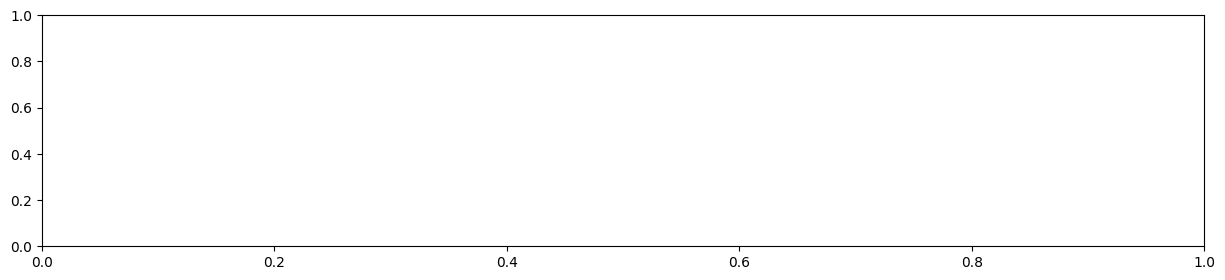

In [160]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 3))
plt.plot(timeline, data['x'])

plt.plot(timeline, data['y'])

plt.plot(timeline, data['z'])